# **Email Alerts for SEC Filings**

## **Overview**
As part of my internship at CFN Media Group, I developed an Email Alerts System that notifies users of new SEC filings for companies they follow. The system aggregates filings data from the SEC API, processes it, and delivers timely email notifications to users. This project showcases my skills in data processing, API integration, and automating data-driven workflows, all of which are crucial in data science roles.

### **Key Features**

- Data Aggregation: Fetches real-time filings data from the SEC API.
- User Personalization: Allows users to subscribe to specific companies.
- Automated Notifications: Sends email alerts when new filings are available.
- Data Processing: Filters and categorizes filings based on their importance.

### **Technologies Used**
- Ruby on Rails: Backend framework for application logic.
- SEC API: Source of financial filings data.
- Mailgun: Email service for sending notifications.
- Cron Jobs: Scheduled tasks for periodic data fetching.

## **Business Implications**
- **Investor Awareness:** Keeps investors informed about significant corporate events.
- **Timeliness:** Provides real-time updates, allowing users to make informed decisions promptly.
- **Customization:** Users receive information tailored to their interests, increasing engagement.
- **Scalability:** The system can handle numerous users and filings, making it suitable for large-scale deployment.

### **Components**
#### **1. Data Retrieval and Processing**
The system interacts with the SEC API to retrieve filings data. It processes JSON responses, extracting relevant information for users.

In [ ]:
def fetch_sec_filings(company_ids):
  query_params = {
      'company_ids': company_ids,
      'date_range': 'last_24_hours'
  }
  response = make_api_call('https://api.sec.gov/filings', params=query_params)
  if response.status_code == 200:
      filings = parse_filings_response(response.json())
      return filings
  else:
      return []

#### **2. Data Filtering and Categorization**
The system filters filings to identify those that are most relevant to users, categorizing them into "Highlighted Filings" and "Other Filings".

In [ ]:
def categorize_filings(filings):
  highlighted_forms = ['10-Q', '10-K', '8-K']
  highlighted_filings = []
  other_filings = []
  
  for filing in filings:
      if filing['form_type'] in highlighted_forms:
          highlighted_filings.append(filing)
      else:
          other_filings.append(filing)
  
  return highlighted_filings, other_filings

#### **3. Automation with Scheduled Jobs**
Automated jobs check for new filings periodically and trigger email notifications, ensuring users receive timely updates.

In [ ]:
def check_for_new_filings():
  subscribed_companies = get_all_subscribed_companies()
  new_filings = fetch_sec_filings(subscribed_companies)
  
  for user in get_all_users():
      user_filings = filter_filings_for_user(new_filings, user)
      highlighted, others = categorize_filings(user_filings)
      if highlighted or others:
          send_email_alert(user, highlighted, others)

### **Screenshots and Visuals**

#### 1. **Email Notification Button**

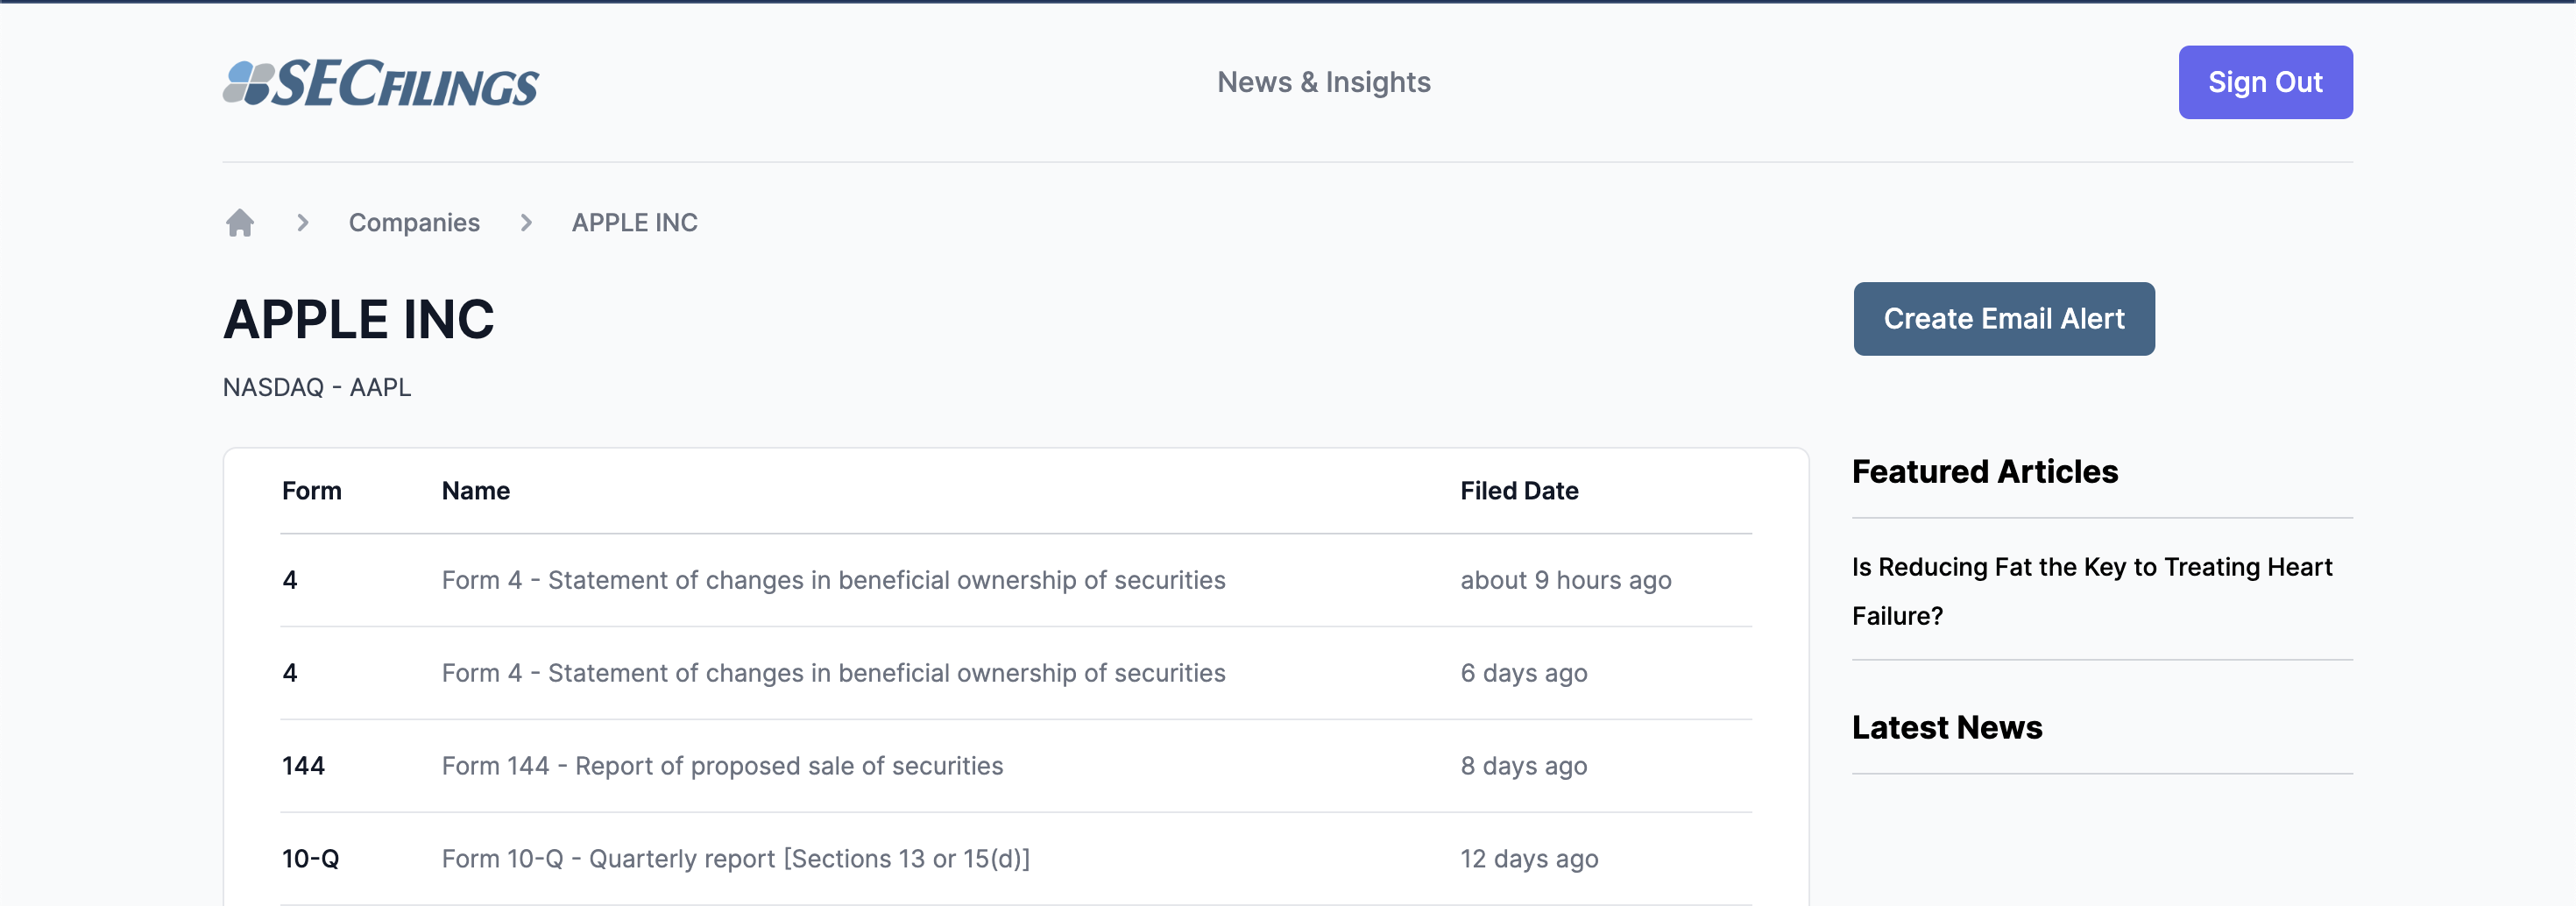

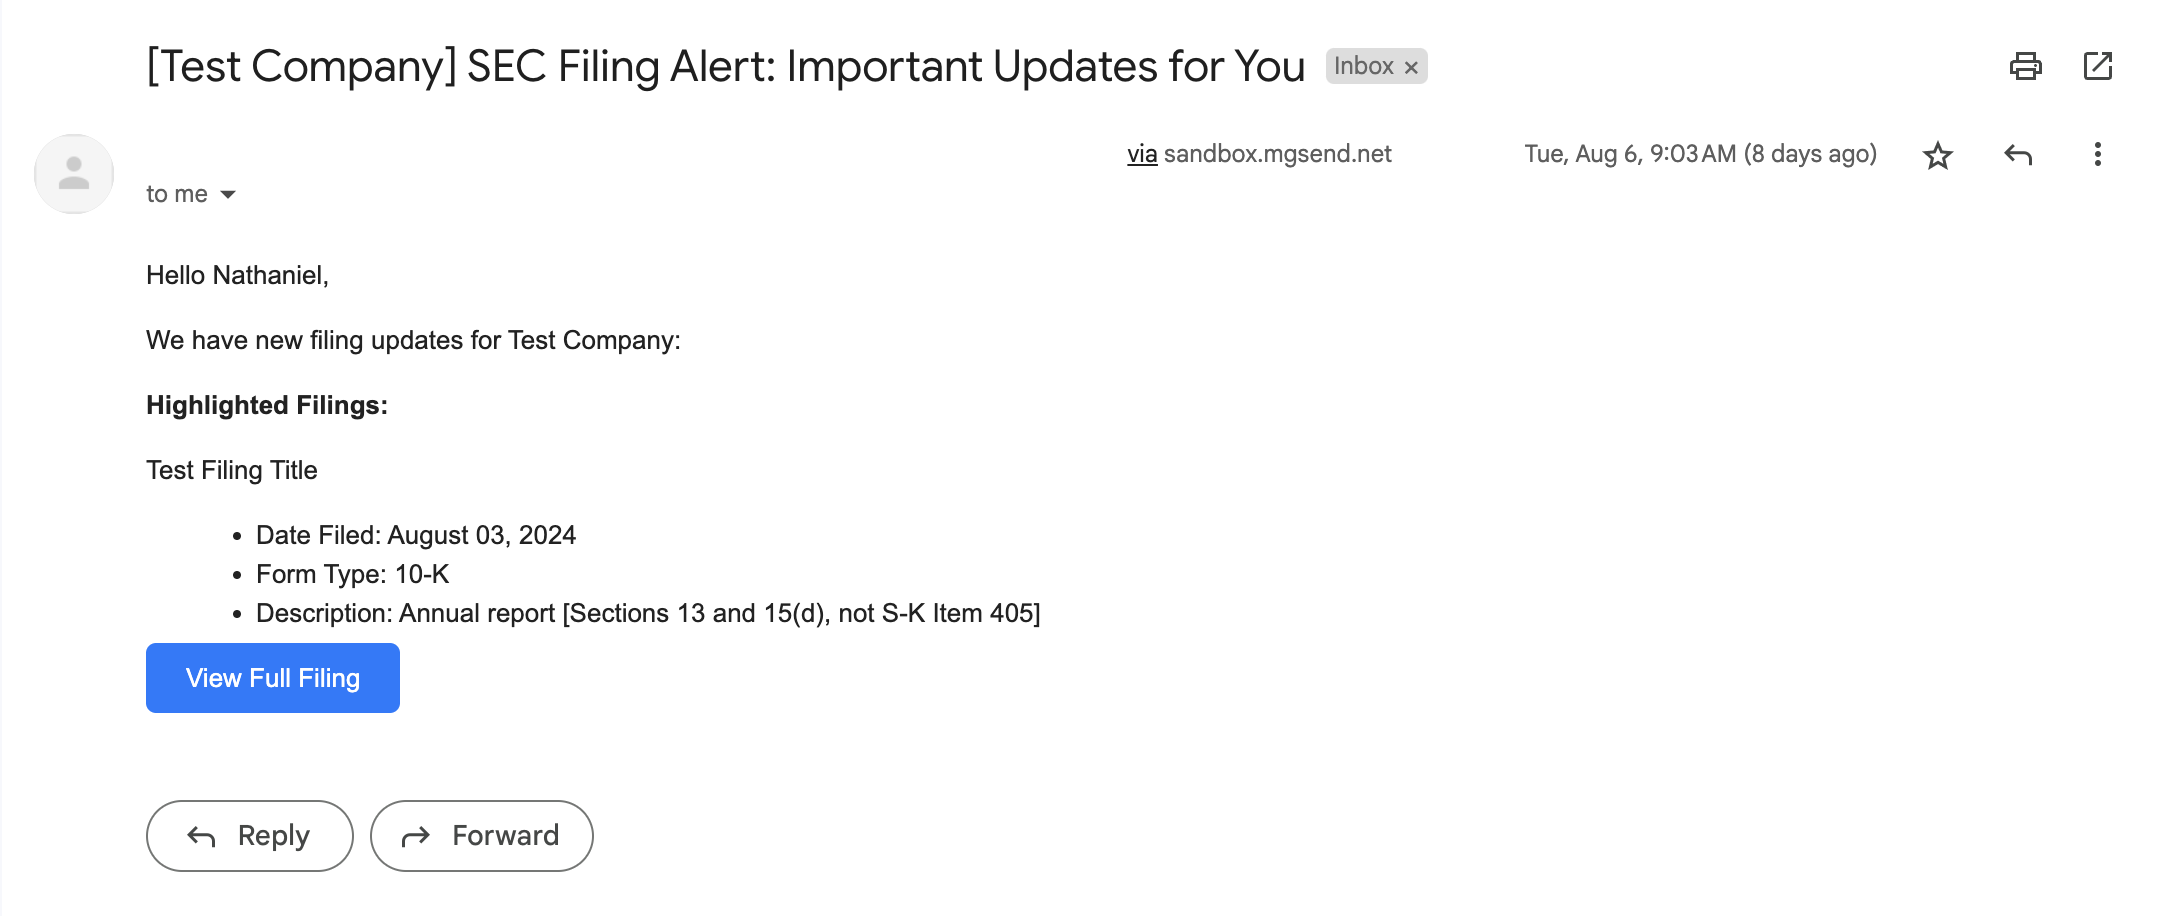

In [3]:
from IPython.display import Image, display

email_alert = 'email_alert.png'
email_sample = 'email_sample.png'
display(Image(filename=email_alert))
display(Image(filename=email_sample))

### **Challenges and Solutions**
#### **Handling API Data Variability**
**Challenge:** The SEC API returns data with varying structures depending on the filing type.

**Solution:** Implemented robust parsing methods and used conditional logic to handle different data formats.

#### **Ensuring Timely Delivery**
**Challenge:** Delays in data retrieval could affect the timeliness of alerts.

**Solution:** Optimized API calls and used background jobs to handle data fetching without blocking the main application.

#### **Potential Enhancements**
- **Data Analysis:** Incorporate analytical features to provide insights on filing trends.
- **User Analytics:** Track user engagement with alerts to improve the system.
- **Machine Learning:** Predict companies of interest to users based on their interactions.

## **Conclusion**
This project highlights my ability to work with real-time data, process and filter information, and automate workflows to deliver value to users. The Email Alerts System serves as a practical application of data science principles in a production environment, addressing a real business need for timely and personalized information delivery.